In [35]:
from enum import Enum

class EstadoDaPessoa:
    SAUDAVEL = 0
    DOENTE = 1
    RECUPERADA = 2
    
class Pessoa:
    def __init__(self, estado, R):
        self.estado = estado
        self.tempoDoente = 0
        self.tempoRecuperacao = R
        
    def passo(self):
        if self.estado == EstadoDaPessoa.DOENTE :
            self.tempoDoente = self.tempoDoente + 1
        if self.tempoDoente > self.tempoRecuperacao:
            self.estado = EstadoDaPessoa.RECUPERADA

In [36]:
class Mundo:
    def __init__(self, largura, altura):
        self.largura = largura
        self.altura = altura
        self.posicaoPessoas = {}
        self.pessoas = []
        
    def adiciona_pessoa(self, pessoa):
        self.pessoas.append(pessoa)
    
    def move_pessoa(self, pessoa, x, y):
        self.posicaoPessoas[pessoa] = (x, y)        

In [37]:
import random

class Simulador:
    def __init__(self, D, S, R):
        #Tamanho do mundo em pontos. Altura, Largura
        self.mundo = Mundo(100, 100)
        self.pessoas = []
        self.tempo = 0
        self.cria_pessoas(D, S, R)
        self.distribui_pessoas()
        self.numDoentes = []
    
    def cria_pessoas(self, D, S, R):        
        #individuos na simulacao
        for i in range(0, D + S):
            #numero de individuos doentes D
            estado = (i < D) if EstadoDaPessoa.DOENTE else EstadoDaPessoa.SAUDAVEL
            p = Pessoa(estado, R)
            self.pessoas.append(p)
            self.mundo.adiciona_pessoa(p)
            
    #Distribui individuos de forma aleatoria no mundo
    def distribui_pessoas(self):
         for p in self.pessoas:
                x = random.randint(0, self.mundo.largura)
                y = random.randint(0, self.mundo.altura)
                self.mundo.move_pessoa(p, x, y)
                
#   Move individuos de forma aleatoria pelo mapa a cada passo de tempo
    def passo_mover_pessoas(self):
        i = 0
        for p in self.pessoas:
            deltaX = random.randint(-1, 1)
            deltaY = random.randint(-1, 1)
            (px,py) = self.mundo.posicaoPessoas[p]
            posPessoaX = min(max(0, px + deltaX), self.mundo.largura)
            posPessoaY = min(max(0, py + deltaY), self.mundo.altura)
            self.mundo.move_pessoa(p, posPessoaX, posPessoaY)
            
#   Contamina individuos saudaveis proximos a doentes (busca pode ser melhorada)
    def passo_contaminar(self):
        for p1 in self.pessoas:
            for p2 in self.pessoas:
                if p1 == p2:
                    continue
                (p1X, p1Y) = self.mundo.posicaoPessoas[p1]
                (p2X, p2Y) = self.mundo.posicaoPessoas[p2]
                
                #Delta é a distancia em pontos para contaminacao
                Delta = 3
                if(abs(p1X-p2X) <= Delta and abs(p1Y - p2Y) <= Delta):
                    if p1.estado == EstadoDaPessoa.DOENTE and p2.estado == EstadoDaPessoa.SAUDAVEL:
                        p2.estado = EstadoDaPessoa.DOENTE
                        
    def passo(self):
#       Mover
        self.passo_mover_pessoas()
            
#       Buscar saudaveis proximos a doentes e simular contaminacao
        self.passo_contaminar()
    
#       Aplica passo as pessoas
        doentes = 0
        for p in self.pessoas:
            p.passo()
            if p.estado == EstadoDaPessoa.DOENTE:
                doentes = doentes + 1
        self.numDoentes.append(doentes)
        self.tempo = self.tempo + 1


In [38]:
import numpy as np
import matplotlib.pyplot as plt

class UI:
    def mostra_doentes(vec):
        plt.plot(vec);
        plt.show()

    def mostra_mapa(mapa):
        x = []
        y = []
        color = []
        for pessoa in mapa.pessoas:
            (px,py) = mapa.posicaoPessoas[pessoa]
            x.append(px)
            y.append(py)
            if pessoa.estado == EstadoDaPessoa.SAUDAVEL:
                color.append("g")
            elif pessoa.estado == EstadoDaPessoa.DOENTE:
                color.append("r")
            else:
                color.append("b")

        plt.xlim(0, mapa.largura)
        plt.ylim(0, mapa.altura)
        plt.scatter(x, y, color=color)
        plt.show()

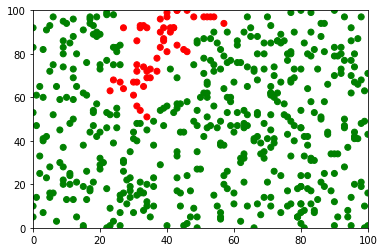

6


KeyboardInterrupt: 

In [40]:
from IPython.display import display, clear_output

D = 2
S = 500
R = 50
T = 400
s = Simulador(D, S, R)
for i in range(0, T):
    s.passo()
    UI.mostra_mapa(s.mundo)
    print(i)
    clear_output(wait=True)
UI.mostra_doentes(s.numDoentes)